# Testing the dense NN for classification using the MNIST image data

## Author: Bojian Xu, bojianxu@ewu.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nn
import sys
sys.path.append('..')
from code_misc.utils import MyUtils

In [2]:
k = 10  #number of classes
d = 784 #number of features, excluding the bias feature

In [4]:
# READ in data
df_X_train = pd.read_csv('MNIST/x_train.csv', header=None)
df_y_train = pd.read_csv('MNIST/y_train.csv', header=None)
df_X_test = pd.read_csv('MNIST/x_test.csv', header=None)
df_y_test = pd.read_csv('MNIST/y_test.csv', header=None)

# save in numpy arrays
X_train_raw = df_X_train.to_numpy()
y_train_raw = df_y_train.to_numpy()
X_test_raw = df_X_test.to_numpy()
y_test_raw = df_y_test.to_numpy()

# get training set size
n_train = X_train_raw.shape[0]
n_test = X_test_raw.shape[0]

# normalize all features to [0,1]
X_all = MyUtils.normalize_0_1(np.concatenate((X_train_raw, X_test_raw), axis=0))
X_train = X_all[:n_train]
X_test = X_all[n_train:]

# convert each label into a 0-1 vector
y_train = np.zeros((n_train, k))
y_test = np.zeros((n_test, k))
for i in range(n_train):
    y_train[i,int(y_train_raw[i])] = 1.0
for i in range(n_test):
    y_test[i,int(y_test_raw[i])] = 1.0


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(y_test)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [5]:
#print(y_train[-10:])

In [26]:
# build the network
nuts = nn.NeuralNetwork()

nuts.add_layer(d = d)  # input layer - 0

nuts.add_layer(d = 100, act = 'logis')  # hidden layer - 1
nuts.add_layer(d = 30, act = 'logis')  # hiddent layer - 2
#nuts.add_layer(d = 100, act = 'relu')  # hiddent layer - 3
#nuts.add_layer(d = 30, act = 'relu')  # hiddent layer - 4

nuts.add_layer(d = k, act = 'logis')  # output layer,    multi-class classification, #classes = k

In [27]:
errors = nuts.fit(X_train, y_train, eta = 0.2, iterations = 100, SGD = False, mini_batch_size = 20)

iteration:  0
Time for feed-forward:  0.6522550582885742
error:  3.4463671983731943
Time for back-propagation:  1.6433887481689453
Time for update weights:  0.0005083084106445312
iteration:  1
Time for feed-forward:  0.7382967472076416
error:  2.393889422004193
Time for back-propagation:  1.5861413478851318
Time for update weights:  0.0005130767822265625
iteration:  2
Time for feed-forward:  0.6787674427032471
error:  1.7381271538623853
Time for back-propagation:  1.6387498378753662
Time for update weights:  0.00051116943359375
iteration:  3
Time for feed-forward:  0.6546308994293213
error:  1.3792880939496157
Time for back-propagation:  1.5421857833862305
Time for update weights:  0.0005130767822265625
iteration:  4
Time for feed-forward:  0.615656852722168
error:  1.1932436224856915
Time for back-propagation:  1.5773751735687256
Time for update weights:  0.00051116943359375
iteration:  5
Time for feed-forward:  0.6461372375488281
error:  1.0921191463773057
Time for back-propagation: 

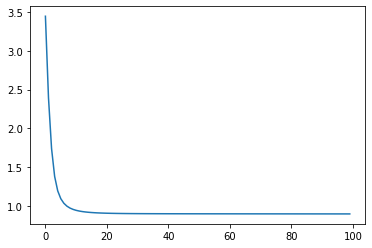

In [28]:
x = np.arange(len(errors))
plt.plot(x, errors)
plt.show()

In [29]:
# x = np.arange(len(errors2))
# plt.plot(x, errors2)
# plt.show()

In [30]:
print(nuts.error(X_train, y_train))
print(nuts.error(X_test, y_test))

Time for feed-forward:  0.6357872486114502
0.8800833333333333
Time for feed-forward:  0.12090444564819336
0.8785


In [31]:
preds = nuts.predict(X_test)

Time for feed-forward:  0.1056966781616211


In [32]:
#print(preds[:100])
#print(y_test_raw[:100])
#print(np.sum(preds != y_test_raw))

In [33]:
# for i in range(y_test.shape[0]):
#     if preds[i] != y_test_raw[i]:
#         print('misclassified!!')
#     print('predicted as', preds[i])
#     print('label is', y_test_raw[i])
#     pixels = X_test_raw[i].reshape((28, 28))
#     plt.imshow(pixels, cmap='gray')
#    plt.show()


In [34]:

misclassified = 0
classified = 0

for i in range(y_test.shape[0]):
    if preds[i] != y_test_raw[i]:
        misclassified += 1
    else:
        classified += 1
print(misclassified)
print(classified)

8785
1215
